<a href="https://colab.research.google.com/github/MrData-Science/Outliers/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carga de librerias

In [1]:
import numpy as np
import pandas as pd

## Conjunto de datos

### Creación de 10 variables continuas con 10,000 registros

In [2]:
num_columnas = 10
num_filas = 10000

In [3]:
datos = np.random.rand(num_filas, num_columnas)
datos

array([[0.34083262, 0.1862205 , 0.28864666, ..., 0.9854453 , 0.83219461,
        0.71792039],
       [0.00473884, 0.12229618, 0.7691194 , ..., 0.65413252, 0.17707551,
        0.7000536 ],
       [0.3701741 , 0.61567702, 0.28437664, ..., 0.68577418, 0.91714393,
        0.4666246 ],
       ...,
       [0.74642536, 0.07034234, 0.38114544, ..., 0.2704679 , 0.89417375,
        0.31725684],
       [0.76876506, 0.09743339, 0.69303808, ..., 0.73609573, 0.35672959,
        0.29476542],
       [0.38137585, 0.80488174, 0.93125859, ..., 0.1882913 , 0.87977765,
        0.85276578]])

### Generacion del 5% de valores nulos por columna

In [4]:
nulos = 0.05

In [5]:
indices_nulos = np.random.choice(num_filas, size=int(0.05*num_filas), replace=False)

In [6]:
datos[indices_nulos] = np.nan

In [7]:
df = pd.DataFrame(datos, columns=[f'Columna_{i+1}' for i in range(num_columnas)])
df

,Columna_1,Columna_2,Columna_3,Columna_4,Columna_5,Columna_6,Columna_7,Columna_8,Columna_9,Columna_10
0,0.340833,0.186220,0.288647,0.060041,0.049067,0.998574,0.263803,0.985445,0.832195,0.717920
1,0.004739,0.122296,0.769119,0.977598,0.599454,0.729914,0.523344,0.654133,0.177076,0.700054
2,0.370174,0.615677,0.284377,0.057617,0.820119,0.839377,0.049507,0.685774,0.917144,0.466625
3,0.070907,0.569903,0.637699,0.079737,0.886106,0.340359,0.740184,0.212503,0.139495,0.669213
4,0.331460,0.727502,0.801952,0.773110,0.675106,0.106018,0.631135,0.848183,0.962841,0.828096
...,...,...,...,...,...,...,...,...,...,...
9995,0.325718,0.381185,0.242080,0.560874,0.049935,0.054970,0.840275,0.056970,0.882089,0.097570
9996,0.493724,0.503039,0.561398,0.590943,0.381183,0.386923,0.320129,0.803840,0.236532,0.905143
9997,0.746425,0.070342,0.381145,0.661075,0.559991,0.381156,0.971524,0.270468,0.894174,0.317257
9998,0.768765,0.097433,0.693038,0.263742,0.008151,0.853477,0.309303,0.736096,0.356730,0.294765


In [8]:
df.isnull().sum().sum()

5000

### Imputación de los datos

In [9]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [10]:
imp_mean.fit(df)

SimpleImputer()

In [11]:
imp_mean.transform(df)

array([[0.34083262, 0.1862205 , 0.28864666, ..., 0.9854453 , 0.83219461,
        0.71792039],
       [0.00473884, 0.12229618, 0.7691194 , ..., 0.65413252, 0.17707551,
        0.7000536 ],
       [0.3701741 , 0.61567702, 0.28437664, ..., 0.68577418, 0.91714393,
        0.4666246 ],
       ...,
       [0.74642536, 0.07034234, 0.38114544, ..., 0.2704679 , 0.89417375,
        0.31725684],
       [0.76876506, 0.09743339, 0.69303808, ..., 0.73609573, 0.35672959,
        0.29476542],
       [0.38137585, 0.80488174, 0.93125859, ..., 0.1882913 , 0.87977765,
        0.85276578]])

In [12]:
df_imputado = pd.DataFrame(imp_mean.transform(df), columns=df.columns, index=df.index)
df_imputado

,Columna_1,Columna_2,Columna_3,Columna_4,Columna_5,Columna_6,Columna_7,Columna_8,Columna_9,Columna_10
0,0.340833,0.186220,0.288647,0.060041,0.049067,0.998574,0.263803,0.985445,0.832195,0.717920
1,0.004739,0.122296,0.769119,0.977598,0.599454,0.729914,0.523344,0.654133,0.177076,0.700054
2,0.370174,0.615677,0.284377,0.057617,0.820119,0.839377,0.049507,0.685774,0.917144,0.466625
3,0.070907,0.569903,0.637699,0.079737,0.886106,0.340359,0.740184,0.212503,0.139495,0.669213
4,0.331460,0.727502,0.801952,0.773110,0.675106,0.106018,0.631135,0.848183,0.962841,0.828096
...,...,...,...,...,...,...,...,...,...,...
9995,0.325718,0.381185,0.242080,0.560874,0.049935,0.054970,0.840275,0.056970,0.882089,0.097570
9996,0.493724,0.503039,0.561398,0.590943,0.381183,0.386923,0.320129,0.803840,0.236532,0.905143
9997,0.746425,0.070342,0.381145,0.661075,0.559991,0.381156,0.971524,0.270468,0.894174,0.317257
9998,0.768765,0.097433,0.693038,0.263742,0.008151,0.853477,0.309303,0.736096,0.356730,0.294765


In [13]:
df_imputado.isnull().sum().sum()

0

In [14]:
df_imputado.describe()

,Columna_1,Columna_2,Columna_3,Columna_4,Columna_5,Columna_6,Columna_7,Columna_8,Columna_9,Columna_10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.499382,0.500744,0.500020,0.501252,0.497906,0.496808,0.500250,0.494803,0.498106,0.503451
std,0.283578,0.280656,0.280293,0.280354,0.280884,0.281969,0.282255,0.280976,0.284020,0.282069
min,0.000076,0.000334,0.000009,0.000015,0.000013,0.000029,0.000007,0.000033,0.000073,0.000162
25%,0.258367,0.264729,0.262035,0.265035,0.262998,0.260385,0.257728,0.260011,0.259076,0.265801
50%,0.499382,0.500744,0.500020,0.501252,0.497906,0.496808,0.500250,0.494803,0.498106,0.503451
75%,0.741741,0.742284,0.731920,0.737014,0.733877,0.734432,0.736406,0.730571,0.740865,0.742830
max,0.999966,0.999991,0.999989,0.999452,0.999891,0.999974,0.999873,0.999967,0.999957,0.999703


### Añadimos valores extremos por cada columna

In [15]:
ext = np.random.normal(loc = 0, scale = 1, size = (10000,10))

In [16]:
for i in range(ext.shape[1]):
  ext[np.random.choice(range(10000),size = 10, replace = False),i ] += np.random.uniform(10,20,size=10)
  ext[np.random.choice(range(10000),size = 10, replace = False),i ] -= np.random.uniform(10,20,size=10)

df_imputado = pd.DataFrame(ext,columns= [f'Columna_{x+1}' for x in range(10)])

In [17]:
df_imputado.describe()

,Columna_1,Columna_2,Columna_3,Columna_4,Columna_5,Columna_6,Columna_7,Columna_8,Columna_9,Columna_10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.000555,-0.004784,-0.005427,0.008840,-0.007754,-0.001902,0.001457,0.014936,-0.001280,-0.015718
std,1.221062,1.198716,1.210674,1.218999,1.223514,1.215270,1.231192,1.230904,1.205706,1.180344
min,-20.956171,-22.040442,-20.177821,-19.286000,-20.099736,-19.405113,-18.614411,-19.991734,-20.465371,-18.794963
25%,-0.676885,-0.670101,-0.688695,-0.682465,-0.689722,-0.657862,-0.663879,-0.660602,-0.669277,-0.698542
50%,0.001806,-0.007690,-0.006239,0.018081,-0.002655,0.001272,-0.015692,0.017876,-0.002525,-0.008401
75%,0.679850,0.666620,0.674713,0.703409,0.666289,0.667923,0.666299,0.673730,0.677416,0.664216
max,19.730608,19.210413,19.259165,18.334202,21.179889,21.799711,21.446518,20.971204,18.887243,19.915765


## Tecnicas de detección de outliers

### IQR

In [18]:
Q1 = df_imputado.quantile(0.25)
Q3 = df_imputado.quantile(0.75)

In [19]:
IQR = Q3-Q1

In [20]:
analisis = -(((df_imputado < (Q1 - 5 * IQR)) | (df_imputado > (Q3 + 5 * IQR)))).any(axis = 1)

In [21]:
analisis

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Length: 10000, dtype: bool

In [22]:
len(df_imputado),len(df_imputado[analisis])

(10000, 9806)

### Zscore

In [23]:
from scipy.stats import zscore
Z_scores = df_imputado.apply(zscore)

In [24]:
Z_scores

,Columna_1,Columna_2,Columna_3,Columna_4,Columna_5,Columna_6,Columna_7,Columna_8,Columna_9,Columna_10
0,-1.124046,-0.000488,-0.701285,-0.553231,0.483778,0.507340,-2.128968,-1.185960,0.960421,0.431502
1,0.328971,-0.842834,0.768125,-0.248301,1.789244,0.104986,0.095241,-1.138575,-0.632692,-0.148639
2,1.589604,-0.711506,-0.638440,1.732142,-1.103302,-1.093352,1.414684,1.194103,0.680063,0.139040
3,-0.376843,1.213406,0.110600,0.675974,0.638396,-2.068982,0.481613,0.655527,-0.618555,1.464396
4,0.227309,-0.095374,-0.419382,0.641379,-0.875173,-0.910240,0.466338,0.803284,-0.435724,1.957468
...,...,...,...,...,...,...,...,...,...,...
9995,0.344035,-1.269087,-0.344105,0.480076,0.572439,0.022629,-1.579953,0.762890,2.551864,-0.824021
9996,0.108972,-0.639712,1.649418,0.998748,-1.288608,-0.181550,0.200657,-0.018052,-1.049773,0.493364
9997,-0.907182,-0.768532,0.899443,-2.023252,-1.356589,-0.326777,-0.132949,0.594166,0.117305,-0.533260
9998,-0.450551,-0.644191,0.802572,-0.693141,0.007086,-0.487678,0.178521,0.261104,-0.482834,1.607690


In [25]:
analisisZ = (Z_scores > -3) & (Z_scores < 3)

In [26]:
analisisZ

,Columna_1,Columna_2,Columna_3,Columna_4,Columna_5,Columna_6,Columna_7,Columna_8,Columna_9,Columna_10
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True,True,True


In [27]:
len(df_imputado),len(df_imputado[analisisZ])

(10000, 10000)

### Winsorization

In [28]:
from scipy.stats.mstats import winsorize

winsorized = df_imputado.apply(winsorize)

In [29]:
winsorized

,Columna_1,Columna_2,Columna_3,Columna_4,Columna_5,Columna_6,Columna_7,Columna_8,Columna_9,Columna_10
0,-1.371906,-0.005369,-0.854412,-0.665515,0.584126,0.614622,-2.619581,-1.444794,1.156647,0.493578
1,0.402229,-1.015052,0.924475,-0.293823,2.181302,0.125677,0.118711,-1.386471,-0.764082,-0.191154
2,1.941463,-0.857635,-0.778331,2.120214,-1.357592,-1.330553,1.743118,1.484689,0.818636,0.148389
3,-0.459570,1.449673,0.128466,0.832810,0.773294,-2.516148,0.594386,0.821787,-0.747038,1.712688
4,0.278100,-0.119104,-0.513137,0.790642,-1.078486,-1.108034,0.575581,1.003652,-0.526609,2.294653
...,...,...,...,...,...,...,...,...,...,...
9995,0.420623,-1.525983,-0.422005,0.594023,0.692598,0.025597,-1.943672,0.953934,3.075364,-0.988297
9996,0.133610,-0.771578,1.991380,1.226252,-1.584304,-0.222523,0.248492,-0.007283,-1.266935,0.566592
9997,-1.107114,-0.925989,1.083451,-2.457379,-1.667477,-0.399005,-0.162220,0.746261,0.140149,-0.645116
9998,-0.549568,-0.776947,0.966177,-0.836056,0.000916,-0.594533,0.221240,0.336314,-0.583407,1.881815


In [30]:
analisisW =  (winsorized > -3) & (winsorized < 3)

In [31]:
analisisW

,Columna_1,Columna_2,Columna_3,Columna_4,Columna_5,Columna_6,Columna_7,Columna_8,Columna_9,Columna_10
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True,False,True
9996,True,True,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True,True,True


In [32]:
len(df_imputado), len(df_imputado[analisisW])

(10000, 10000)

## Visualizacion de los datos

### Datos sin tratamiento

array([[<Axes: title={'center': 'Columna_1'}>,
        <Axes: title={'center': 'Columna_2'}>,
        <Axes: title={'center': 'Columna_3'}>],
       [<Axes: title={'center': 'Columna_4'}>,
        <Axes: title={'center': 'Columna_5'}>,
        <Axes: title={'center': 'Columna_6'}>],
       [<Axes: title={'center': 'Columna_7'}>,
        <Axes: title={'center': 'Columna_8'}>,
        <Axes: title={'center': 'Columna_9'}>],
       [<Axes: title={'center': 'Columna_10'}>, <Axes: >, <Axes: >]],
      dtype=object)

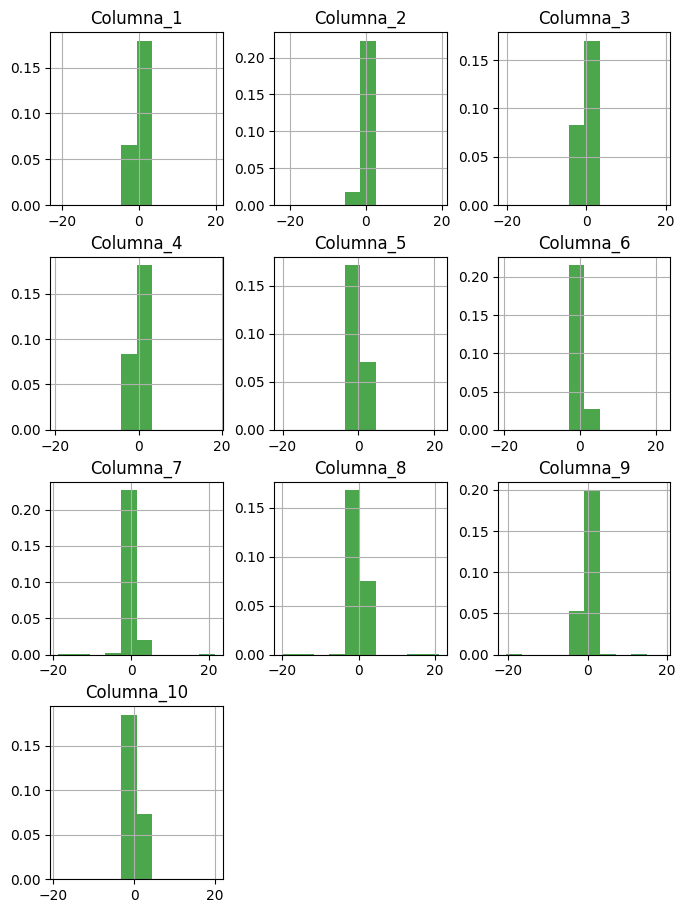

In [33]:
df_imputado.hist(figsize=(8,11), color = 'green',alpha=0.7,density=True)

### Datos despues del tratamiento

#### IQR

array([[<Axes: title={'center': 'Columna_1'}>,
        <Axes: title={'center': 'Columna_2'}>,
        <Axes: title={'center': 'Columna_3'}>],
       [<Axes: title={'center': 'Columna_4'}>,
        <Axes: title={'center': 'Columna_5'}>,
        <Axes: title={'center': 'Columna_6'}>],
       [<Axes: title={'center': 'Columna_7'}>,
        <Axes: title={'center': 'Columna_8'}>,
        <Axes: title={'center': 'Columna_9'}>],
       [<Axes: title={'center': 'Columna_10'}>, <Axes: >, <Axes: >]],
      dtype=object)

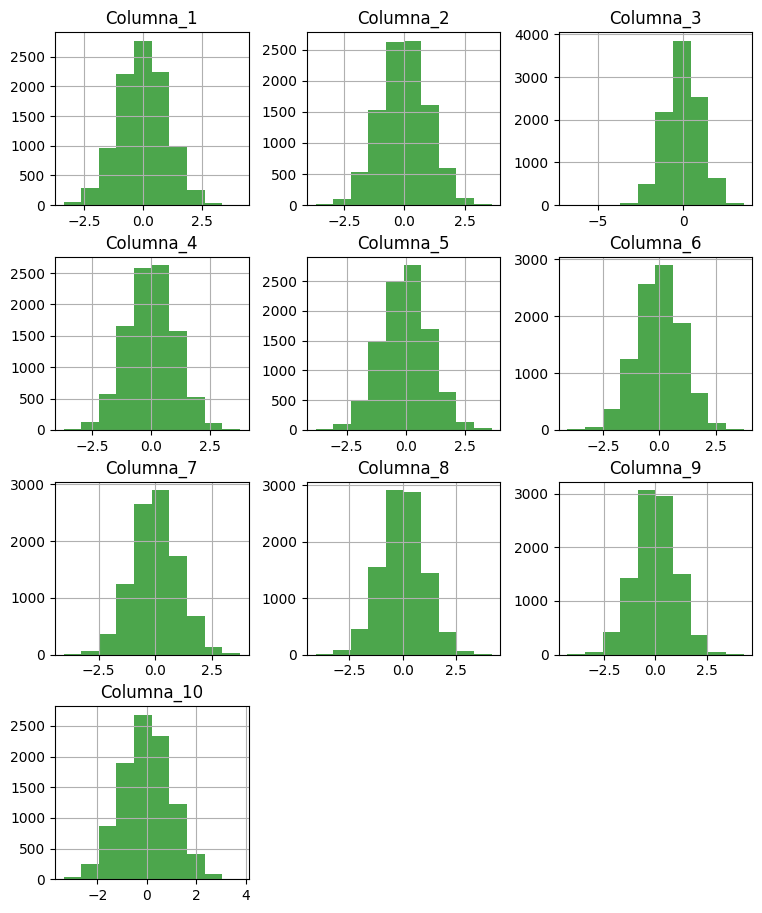

In [34]:
df_imputado[analisis].hist(figsize=(9,11),color='green',alpha=0.7)

#### Zscore

array([[<Axes: title={'center': 'Columna_1'}>,
        <Axes: title={'center': 'Columna_2'}>,
        <Axes: title={'center': 'Columna_3'}>],
       [<Axes: title={'center': 'Columna_4'}>,
        <Axes: title={'center': 'Columna_5'}>,
        <Axes: title={'center': 'Columna_6'}>],
       [<Axes: title={'center': 'Columna_7'}>,
        <Axes: title={'center': 'Columna_8'}>,
        <Axes: title={'center': 'Columna_9'}>],
       [<Axes: title={'center': 'Columna_10'}>, <Axes: >, <Axes: >]],
      dtype=object)

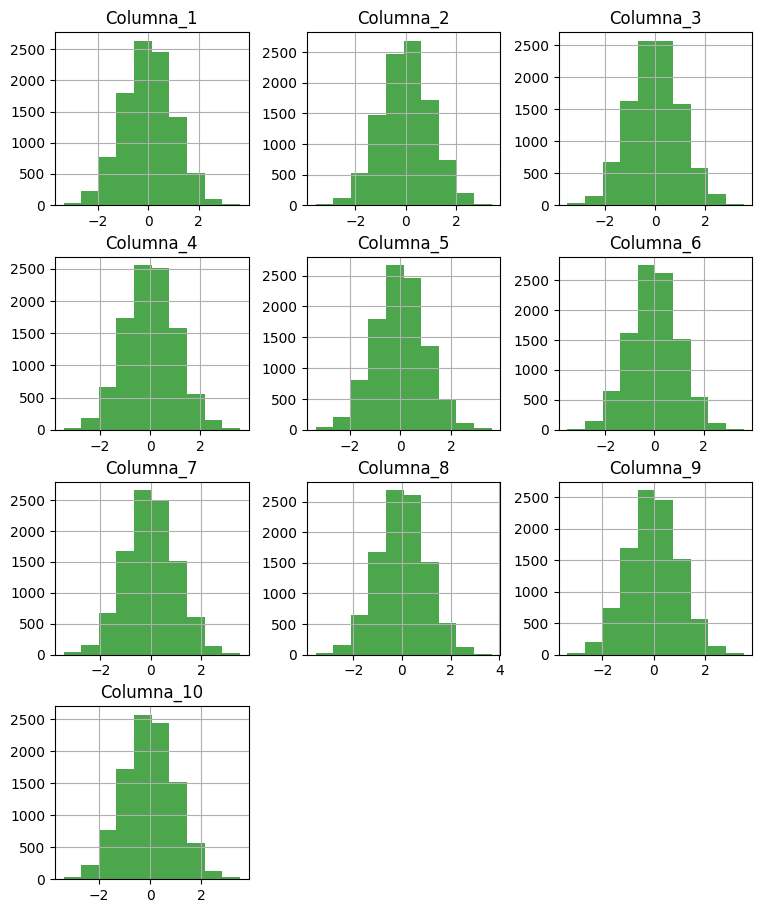

In [35]:
df_imputado[analisisZ].hist(figsize=(9,11),color='green',alpha=0.7)

array([[<Axes: title={'center': 'Columna_1'}>,
        <Axes: title={'center': 'Columna_2'}>,
        <Axes: title={'center': 'Columna_3'}>],
       [<Axes: title={'center': 'Columna_4'}>,
        <Axes: title={'center': 'Columna_5'}>,
        <Axes: title={'center': 'Columna_6'}>],
       [<Axes: title={'center': 'Columna_7'}>,
        <Axes: title={'center': 'Columna_8'}>,
        <Axes: title={'center': 'Columna_9'}>],
       [<Axes: title={'center': 'Columna_10'}>, <Axes: >, <Axes: >]],
      dtype=object)

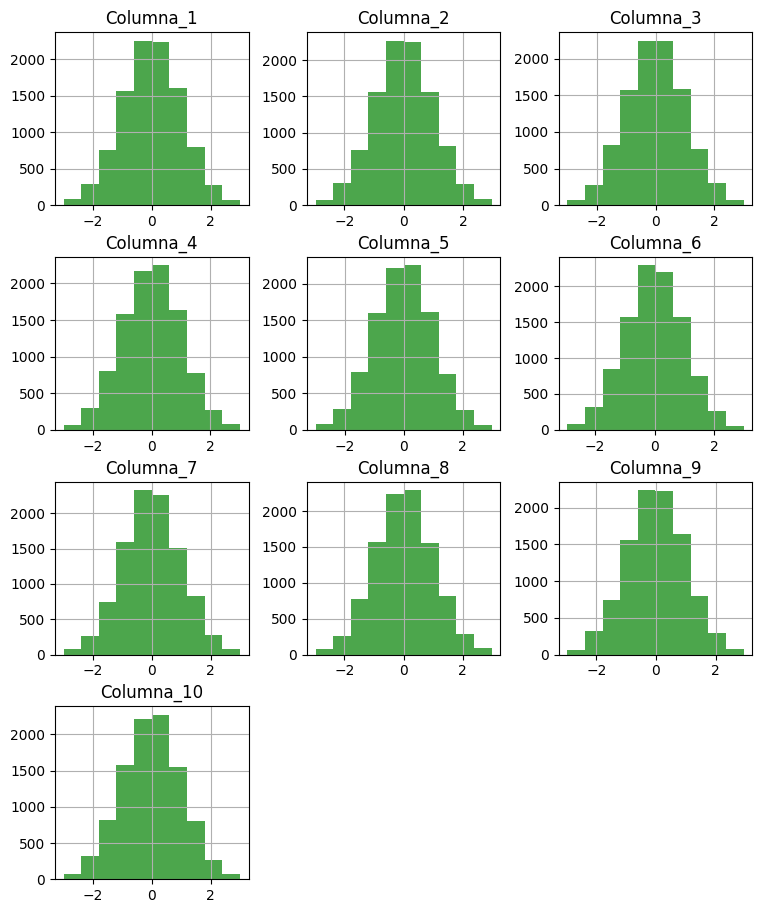

In [36]:
df_imputado[analisisW].hist(figsize=(9,11),color= 'green',alpha=0.7)